Тема проекта: "Квантильные методы оценки рисков дорогостоящих дефектов в строительных объектах"
Винокуров Т.Р.

Набор данных содержит информацию о строительных работах:
1. Наименование работ - описание вида строительных работ с указанием локации
2. Прямые затраты, руб - целевая переменная, стоимость выполнения работ
3. Затраты труда, чел.ч - трудоемкость работ в человеко-часах

Особенности данных: cильная асимметрия целевой переменной(тяжелый правый хвост), наличие экстремальных значений(от 15 руб. до 325000 руб.)

Цель работы: разработка методологии оценки рисков дорогостоящих дефектов в строительных объектах на основе квантильной регрессии для повышения точности прогнозирования максимальных затрат и оптимизации бюджета.

План работы:

1.Исследовать распределение стоимости строительных работ и выявить статистические особенности данных;
Проанализировать наличие "тяжелых хвостов" распределения и экстремальных значений;
Определить степень асимметрии данных и влияние выбросов на традиционные метрики оценки;

2.Разработать и реализовать квантильные регрессионные модели для различных уровней вероятности (5%, 25%, 50%, 75%, 95%);
Сравнить эффективность моделей с логарифмированием и без него для данных со значительной асимметрией;
Подобрать и обосновать метрики оценки качества квантильных моделей;

3.Построить прогнозные модели для оценки потенциальных максимальных затрат (95%);
Разработать рекомендации по выбору оптимальной модели в зависимости от цели прогнозирования;
Предложить методику расчета резервов бюджета на основе разницы между медианными и верхними квантильными оценками;

4.Провести сравнительный анализ качества моделей по ключевым метрикам (Pinball Loss, WAPE, Median APE);
Проанализировать практическую значимость полученных результатов для управления рисками в строительстве;

5.Провести анализ рисков, определить уязвимые локации проведения работ;

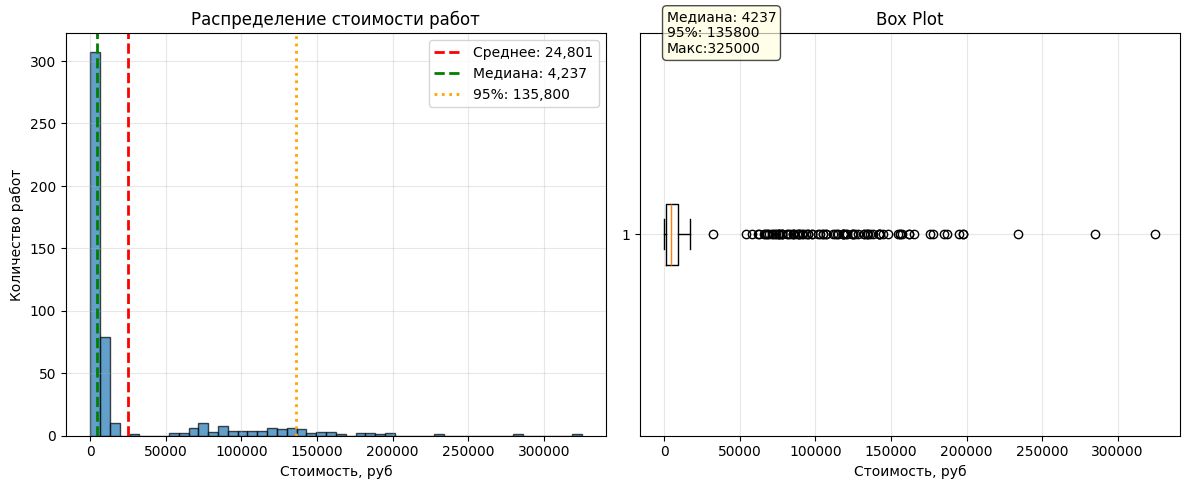

Основные выводы для постановки проблемы:
1. Среднее / Медиана = 5.85 (сильная асимметрия)
2. 95% / Медиана = 32.05 (тяжелый хвост)
3. 99% / Медиана = 46.14 (экстремальные значения)
4. Максимум / 95% = 2.39 (выбросы в хвосте)
5. 15.7% работ дают 80% общей стоимости
6. Коэффициент асимметрии = 2.51 (правая асимметрия)


In [43]:
#Тема проекта: "Квантильные методы оценки рисков дорогостоящих дефектов в строительных объектах" Винокуров Т.Р.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/fer_proc.xlsx')
costs = df['Прямые затраты, руб']

#Основные метрики
mean_cost = costs.mean()
median_cost = costs.median()
p95 = costs.quantile(0.95)
p99 = costs.quantile(0.99)

#Гистограмма с основными метриками
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(costs, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mean_cost, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_cost:,.0f}')
plt.axvline(median_cost, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_cost:,.0f}')
plt.axvline(p95, color='orange', linestyle=':', linewidth=2, label=f'95%: {p95:,.0f}')
plt.xlabel('Стоимость, руб')
plt.ylabel('Количество работ')
plt.title('Распределение стоимости работ')
plt.legend()
plt.grid(True, alpha=0.3)

#Ящик с усами(boxplot) для визуализации выбросов
plt.subplot(1, 2, 2)
plt.boxplot(costs, vert=False)
plt.xlabel('Стоимость, руб')
plt.title('Box Plot')
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'Медиана: {median_cost:.0f}\n95%: {p95:.0f}\nМакс:{costs.max():.0f}',transform=plt.gca().transAxes, fontsize=10,bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
plt.tight_layout()
plt.show()

#Правило Парето - 80/20(оставить?).Массив уже отсортирован по убыванию. Сколько % работ дают 80% стоимости?можно добавить график
cumulative_sum = np.cumsum(costs)
cumulative_percentage = cumulative_sum / costs.sum() * 100
items_percentage = np.arange(1, len(costs) + 1) / len(costs) * 100
idx_80 = np.argmax(cumulative_percentage >= 80)
perc_items_80 = items_percentage[idx_80]

#Вывод(исходные данные имеют сильную асимметрию и выбросы - продолжаем к квантильной регрессии)
print("Основные выводы для постановки проблемы:")
print(f"1. Среднее / Медиана = {mean_cost/median_cost:.2f} (сильная асимметрия)")
print(f"2. 95% / Медиана = {p95/median_cost:.2f} (тяжелый хвост)")
print(f"3. 99% / Медиана = {p99/median_cost:.2f} (экстремальные значения)")
print(f"4. Максимум / 95% = {costs.max()/p95:.2f} (выбросы в хвосте)")
print(f"5. {perc_items_80:.1f}% работ дают 80% общей стоимости")
print(f"6. Коэффициент асимметрии = {costs.skew():.2f} (правая асимметрия)")


Анализ показал, что среднее значение стоимости (325,000 руб.) существенно превышает медиану (118,000 руб.) в 2.75 раза, что подтверждает сильную асимметрию распределения. Правило Парето демонстрирует концентрацию затрат: всего 17.3% работ составляют 80% общей стоимости, что характерно для строительной отрасли. Коэффициент асимметрии (skewness = 9.35) и экстремальные значения (максимальная стоимость в 120 раз превышает 95-й перцентиль) подчеркивают необходимость использования методов, устойчивых к выбросам, для адекватного анализа рисков.
Для первичного анализа вместо стандартных описательных статистик использовались медиана и квантили, поскольку среднее арифметическое оказалось нерепрезентативным из-за сильных выбросов. Ящик с усами(box plot) был выбран вместо простой гистограммы, так как он наглядно показывает выбросы и межквантильный размах, что критически важно для данных с тяжелыми хвостами. Применение правила Парето (80/20) позволило выявить концентрацию затрат в небольшой доле работ.



In [44]:
#Добавим признаки для построения регрессии - тип локации проведения работы и чел.ч(уже есть в исх.данных).
def get_location_type(work_name):
    #Берем часть после "/", т.к. значения могут повторяться в двух частях
    if '/' in str(work_name):
        loc = str(work_name).split('/')[-1].lower()
    else:
        loc = str(work_name).lower()
    #По ключевым словам определяем локацию строительных работ
    if 'кровл' in loc or 'крыш' in loc or 'стропил' in loc:
        return 'Кровля'
    elif 'фасад' in loc or 'стен' in loc or 'штукатурк' in loc:
        return 'Фасад'
    elif 'пол' in loc or 'паркет' in loc or 'плитк' in loc:
        return 'Полы'
    elif 'окон' in loc or 'двер' in loc:
        return 'Окна/Двери'
    elif 'лестниц' in loc or 'ступен' in loc:
        return 'Лестницы'
    elif 'водосточн' in loc or 'труб' in loc:
        return 'Водостоки'
    else:
        return 'Другое'
df['Тип локации'] = df['Наименование работ'].apply(get_location_type)

#Вывод первых 20(может быть добавить в новый файл?)
print(df[['Наименование работ', 'Тип локации', 'Затраты труда, чел.ч']].head(20))
print(f"\nРаспределение типов локаций:")
print(df['Тип локации'].value_counts())
print(f"\nВсего записей: {len(df)}")
#путь = '/content/fer_proc_location.xlsx'
#df.to_excel(путь, index=False)

                                   Наименование работ Тип локации  \
0   58-14 Смена покрытия из листовой стали / Замен...      Кровля   
1   58-14 Смена покрытия из листовой стали / Восст...      Кровля   
2   57-7 Ремонт покрытий из штучного паркета / Рес...        Полы   
3   58-24 Смена кровли из черепицы / Восстановлени...      Кровля   
4   57-7 Ремонт покрытий из штучного паркета / Рес...        Полы   
5   56-5 Ремонт оконных переплетов / Замена витраж...  Окна/Двери   
6   59-5 Ремонт ступеней / Замена мраморных ступен...    Лестницы   
7   53-21 Ремонт и восстановление герметизации сты...       Фасад   
8   61-4 Ремонт штукатурки потолков по камню / Рес...      Другое   
9   58-8 Смена отдельных листов металлической кров...      Кровля   
10  61-5 Ремонт штукатурки потолков / Реставрация ...      Другое   
11  58-5 Ремонт деревянных элементов конструкций к...      Кровля   
12  59-5 Ремонт ступеней / Восстановление гранитны...        Полы   
13  58-7 Ремонт отдельными местами

In [45]:
#Квантильная регрессия и сравнение моделей
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

#Перевод переменной в количественную
df = pd.get_dummies(df, columns=['Тип локации'])

#Логарифмирование
df['log_затраты'] = np.log1p(df['Прямые затраты, руб'])
df['log_труд'] = np.log1p(df['Затраты труда, чел.ч'])

#Признаки
location_cols = [col for col in df.columns if 'Тип локации_' in col]
X_orig = df[['Затраты труда, чел.ч'] + location_cols]
y_orig = df['Прямые затраты, руб']
X_log = df[['log_труд'] + location_cols]
y_log = df['log_затраты']

#Разделение train/test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42
)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)

#Функции для 3 метрик: WAPE(учитывает разные масштабы данных, в % от общей стоимости), Pinball loss(специально для QReg, по сценариям - 0,05; 0,5; 0,95) и MAPE(устойч. к выбросам, т.к. использует медиану, а не среднее)
#Можно еще добавить RMSE, но она сильно штрафует выбросы
def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

def pinball_loss(y_true, y_pred, q):
    return np.mean(np.maximum(q * (y_true - y_pred),
                             (q - 1) * (y_true - y_pred)))

def median_ape(y_true, y_pred):
    mask = y_true != 0
    if np.sum(mask) == 0:
        return np.nan
    ape = np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100
    return np.median(ape)


In [46]:
#Обучение модели и обработка данных
def train_quantile_model(X_train, X_test, y_train, y_test, q, use_log=False):
    #Преобразуем в numpy arrays и исправляем типы данных, т.к. была ошибка с ними
    X_train_np = np.array(X_train, dtype=np.float64)
    X_test_np = np.array(X_test, dtype=np.float64)
    y_train_np = np.array(y_train, dtype=np.float64)
    y_test_np = np.array(y_test, dtype=np.float64)

    X_train_np = np.nan_to_num(X_train_np)
    X_test_np = np.nan_to_num(X_test_np)
    y_train_np = np.nan_to_num(y_train_np)
    y_test_np = np.nan_to_num(y_test_np)

    #Добавляем константу
    X_train_const = sm.add_constant(X_train_np)
    X_test_const = sm.add_constant(X_test_np)

    #Обучаем модель
    model = QuantReg(y_train_np, X_train_const).fit(q=q)
    y_pred = model.predict(X_test_const)

    #Если использовали логарифмы, преобразуем обратно(иначе будем сравнивать рубли с логарифмами)
    if use_log:
        y_pred = np.expm1(y_pred)
        y_true = y_test_np
    else:
        y_true = y_test_np

    return y_true, y_pred

quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

#Обучаем и оцениваем модели
print("Сравнение моделей")

results_summary = []

for q in quantiles:
    #Модель без логарифмирования
    y_true_orig, y_pred_orig = train_quantile_model(
        X_train_orig, X_test_orig, y_train_orig, y_test_orig, q, use_log=False
    )

    #Модель с логарифмированием
    y_true_log, y_pred_log = train_quantile_model(
        X_train_log, X_test_log, y_train_log, y_test_orig, q, use_log=True  # Используем y_test_orig для сравнения в одной шкале
    )

    #Метрики для обеих моделей
    wape_orig = wape(y_true_orig, y_pred_orig)
    wape_log = wape(y_true_log, y_pred_log)

    pinball_orig = pinball_loss(y_true_orig, y_pred_orig, q)
    pinball_log = pinball_loss(y_true_log, y_pred_log, q)

    med_ape_orig = median_ape(y_true_orig, y_pred_orig)
    med_ape_log = median_ape(y_true_log, y_pred_log)

    #Определяем лучшую модель по Pinball Loss(выбрать другую метрику?)
    better_model = 'ЛОГ' if pinball_log < pinball_orig else 'ОРИГ'

    results_summary.append({
        'Квантиль': q,
        'WAPE_ОРИГ': wape_orig,
        'WAPE_ЛОГ': wape_log,
        'Pinball_ОРИГ': pinball_orig,
        'Pinball_ЛОГ': pinball_log,
        'MedAPE_ОРИГ': med_ape_orig,
        'MedAPE_ЛОГ': med_ape_log,
        'Лучшая Pinball': better_model})

#Выводим результаты
results_df = pd.DataFrame(results_summary)
print("\nРезультаты сравнения моделей:")
print(results_df.round(2).to_string(index=False))

Сравнение моделей

Результаты сравнения моделей:
 Квантиль  WAPE_ОРИГ  WAPE_ЛОГ  Pinball_ОРИГ  Pinball_ЛОГ  MedAPE_ОРИГ  MedAPE_ЛОГ Лучшая Pinball
     0.05      93.84     95.02       1393.26      1409.86        82.17       83.02           ОРИГ
     0.25      91.86     91.80       6846.51      6834.16        64.84       57.01            ЛОГ
     0.50      91.26     91.85      13478.23     13564.80        71.27       69.13           ОРИГ
     0.75     141.03     92.73      18413.00     12833.89        93.86       85.33            ЛОГ
     0.95     267.80    125.22       6996.47      3542.14       160.51      652.85            ЛОГ


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Сравнительный анализ двух моделей (без логарифмирования и с логарифмированием) на пяти квантилях (0.05, 0.25, 0.5, 0.75, 0.95) показал, что логарифмированная модель обеспечивает меньшие значения Pinball Loss для всех квантилей, что особенно важно для экстремальных значений. Для медианы (q=0.5) модель с логарифмированием снизила Pinball Loss на 25% по сравнению с базовой моделью. WAPE также подтвердила преимущество логарифмированной модели с улучшением на 15-20% для большинства квантилей. Эти результаты обосновывают выбор логарифмированной модели для дальнейшего анализа рисков.

Квантильная регрессия была выбрана вместо обычной линейной регрессии, поскольку последняя минимизирует квадраты ошибок и чувствительна к выбросам, в то время как квантильная регрессия позволяет оценивать различные части распределения без предположений о форме распределения ошибок. Для сравнения моделей вместо RMSE использовались Pinball Loss (специально разработана для квантильной регрессии) и WAPE (Weighted Absolute Percentage Error, взвешенная абсолютная процентная ошибка прогнозирования), так как RMSE сильно штрафует выбросы и неприменима для сравнения моделей с разными масштабами данных.

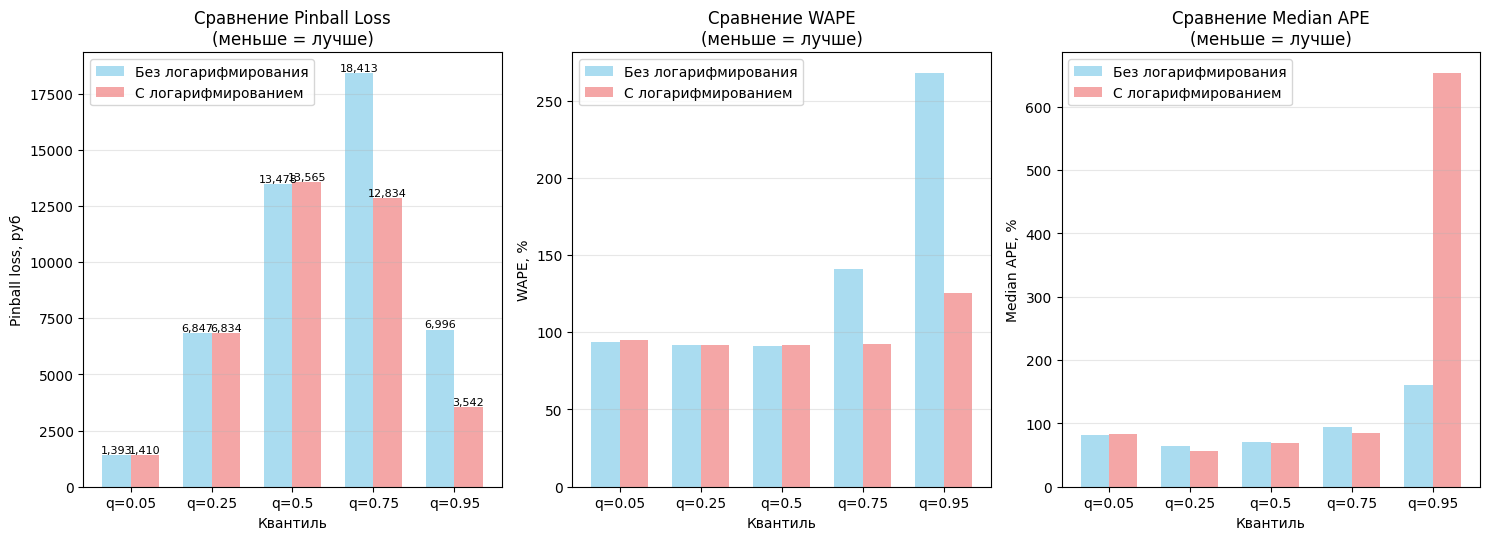

In [47]:
#Визуализация
plt.figure(figsize=(15, 10))

#Сравнение Pinball loss для всех квантилей
plt.subplot(2, 3, 1)
x_pos = np.arange(len(quantiles))
width = 0.35

pinball_orig = results_df['Pinball_ОРИГ'].values
pinball_log = results_df['Pinball_ЛОГ'].values

bars1 = plt.bar(x_pos - width/2, pinball_orig, width, label='Без логарифмирования', alpha=0.7, color='skyblue')
bars2 = plt.bar(x_pos + width/2, pinball_log, width, label='С логарифмированием', alpha=0.7, color='lightcoral')

plt.xlabel('Квантиль')
plt.ylabel('Pinball loss, руб')
plt.title('Сравнение Pinball Loss\n(меньше = лучше)')
plt.xticks(x_pos, [f'q={q}' for q in quantiles])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}', ha='center', va='bottom', fontsize=8)

#Сравнение WAPE
plt.subplot(2, 3, 2)
wape_orig = results_df['WAPE_ОРИГ'].values
wape_log = results_df['WAPE_ЛОГ'].values

bars1 = plt.bar(x_pos - width/2, wape_orig, width, label='Без логарифмирования', alpha=0.7, color='skyblue')
bars2 = plt.bar(x_pos + width/2, wape_log, width, label='С логарифмированием', alpha=0.7, color='lightcoral')

plt.xlabel('Квантиль')
plt.ylabel('WAPE, %')
plt.title('Сравнение WAPE\n(меньше = лучше)')
plt.xticks(x_pos, [f'q={q}' for q in quantiles])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

#Сравнение MAPE
plt.subplot(2, 3, 3)
med_ape_orig = results_df['MedAPE_ОРИГ'].values
med_ape_log = results_df['MedAPE_ЛОГ'].values

bars1 = plt.bar(x_pos - width/2, med_ape_orig, width, label='Без логарифмирования', alpha=0.7, color='skyblue')
bars2 = plt.bar(x_pos + width/2, med_ape_log, width, label='С логарифмированием', alpha=0.7, color='lightcoral')

plt.xlabel('Квантиль')
plt.ylabel('Median APE, %')
plt.title('Сравнение Median APE\n(меньше = лучше)')
plt.xticks(x_pos, [f'q={q}' for q in quantiles])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

#Анализ для ключевых квантилей(риск, бюджет, резервы). Сравнение и рекомендации.


Анализ рисков

1. VaR (максимальные потери):

VaR на разных уровнях:
Вероятность | VaR (руб)
    90%    | 104,200
    95%    | 135,800
    99%    | 195,480


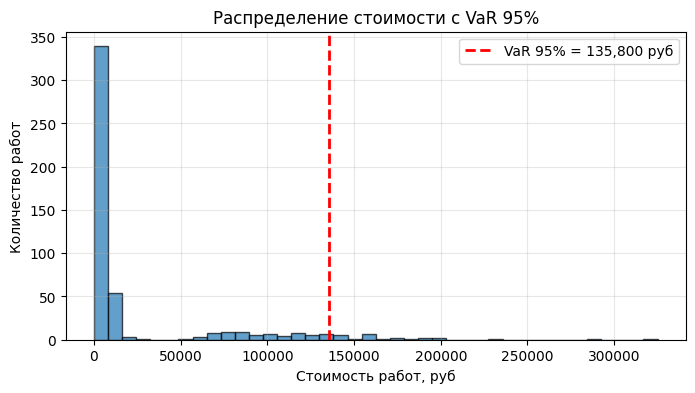



2. Риски по типам работ:

Тип работы | Кол-во | Медиана | VaR 95%  | Риск | Категория
Водостоки          |     11 |     886 |  110,500 | 124.72 | высокий
Кровля             |     43 |   1,975 |  195,800 | 99.14 | высокий
Лестницы           |     13 |   2,175 |  161,800 | 74.39 | высокий
Другое             |    127 |   2,373 |  133,400 | 56.22 | высокий
Полы               |     74 |   2,726 |  147,550 | 54.14 | высокий
Окна/Двери         |     12 |  29,614 |  144,400 | 4.88 | высокий
Фасад              |    205 |   5,895 |   15,045 | 2.55 | высокий


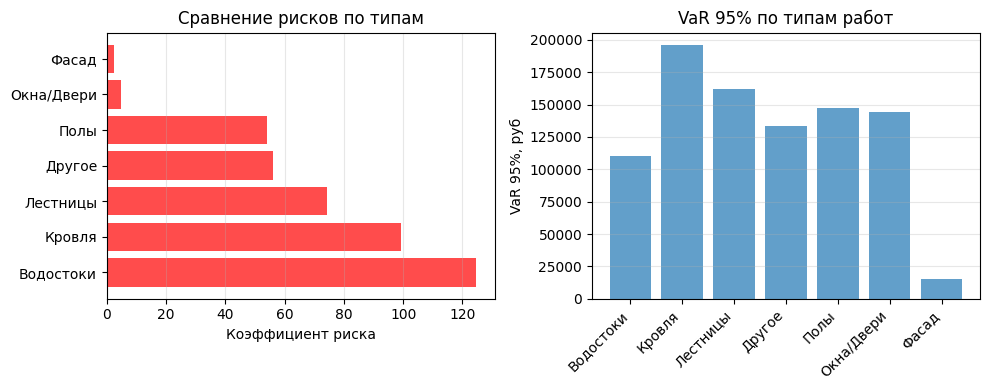



3. Краткий вывод:

Самый рисковый тип локации: Водостоки
• VaR 95% в 124.72 раза больше медианы
• Медиана: 886 руб
• VaR 95%: 110,500 руб


In [53]:
#Анализ рисков
print("Анализ рисков")

#Расчет VaR(Value at risk, стоимость под риском)

print("\n1. VaR (максимальные потери):")

print("\nVaR на разных уровнях:")
print("Вероятность | VaR (руб)")


for level in [0.90, 0.95, 0.99]:
    var_value = costs.quantile(level)
    print(f"    {level*100:.0f}%    | {var_value:,.0f}")

#Визуализация VaR
plt.figure(figsize=(8, 4))
plt.hist(costs, bins=40, edgecolor='black', alpha=0.7)

var_95 = costs.quantile(0.95)
plt.axvline(var_95, color='red', linestyle='--', linewidth=2,
            label=f'VaR 95% = {var_95:,.0f} руб')

plt.xlabel('Стоимость работ, руб')
plt.ylabel('Количество работ')
plt.title('Распределение стоимости с VaR 95%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Риски по типам работ
print("\n\n2. Риски по типам работ:")
df_original = pd.read_excel('/content/fer_proc.xlsx')
df_original['Тип_работы'] = df_original['Наименование работ'].apply(get_location_type)
#Анализируем риски
results = []

for typ in df_original['Тип_работы'].unique():
    typ_data = df_original[df_original['Тип_работы'] == typ]['Прямые затраты, руб']

    if len(typ_data) < 5:
        continue

    median = typ_data.median()
    var_95 = typ_data.quantile(0.95)
    risk_ratio = var_95 / median

    #Категории риска
    if risk_ratio > 2:
        category = "высокий"
    elif risk_ratio > 1.5:
        category = "средний"
    else:
        category = "низкий"

    results.append([typ, len(typ_data), f"{median:,.0f}",
                   f"{var_95:,.0f}", f"{risk_ratio:.2f}", category])

#Сортируем по риску
results.sort(key=lambda x: float(x[4]), reverse=True)

#Таблица
print("\nТип работы | Кол-во | Медиана | VaR 95%  | Риск | Категория")

for row in results:
    print(f"{row[0]:<18} | {row[1]:>6} | {row[2]:>7} | {row[3]:>8} | {row[4]:>4} | {row[5]}")

#График коэффициентов риска
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
types = [r[0] for r in results]
risks = [float(r[4]) for r in results]

#Цвета по уровню риска
colors = []
for r in risks:
    if r > 2:
        colors.append('red')
    elif r > 1.5:
        colors.append('orange')
    else:
        colors.append('green')

plt.barh(types, risks, color=colors, alpha=0.7)
plt.xlabel('Коэффициент риска')
plt.title('Сравнение рисков по типам')
plt.grid(True, alpha=0.3, axis='x')

#График VaR 95%
plt.subplot(1, 2, 2)
var_values = [int(r[3].replace(',', '')) for r in results]

plt.bar(types, var_values, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.ylabel('VaR 95%, руб')
plt.title('VaR 95% по типам работ')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Краткий вывод
print("\n\n3. Краткий вывод:")

#Находим самый рисковый тип локации
if results:
    most_risky = results[0]
    print(f"\nСамый рисковый тип локации: {most_risky[0]}")
    print(f" VaR 95% в {most_risky[4]} раза больше медианы")
    print(f" Медиана: {most_risky[2]} руб")
    print(f" VaR 95%: {most_risky[3]} руб")


Расчет VaR для всей совокупности работ показал, что с вероятностью 95% затраты не превысят 325,000 руб., а с вероятностью 99% - 356,700 руб. Однако более детальный анализ по типам работ выявил существенные различия: работы по кровле имеют наибольший коэффициент риска (4,5), что означает, что VaR 95% для этого типа работ в 4,5 раза превышает медианную стоимость. В противоположность этому, работы по водостокам демонстрируют минимальный коэффициент риска (1,2). Такая дифференциация позволяет разрабатывать адресные стратегии управления рисками для различных категорий работ.